<a href="https://colab.research.google.com/github/syncomint/datascience-foodhub/blob/main/FDS_Project_LearnerNotebook_LowCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60 points**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are a Data Scientist at Foodhub and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. Read along carefully to complete the project.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. Please replace the blank with the right code snippet. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw an error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* You can the results/observations derived from the analysis here and use them to create your final report.

### Let us start by importing the required libraries

In [6]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [8]:
# Read the data
df = pd.read_csv('sample_data/foodhub_order.csv')
# Returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [15]:
# Check the shape of the dataset
print("No of Rows in the data set are: ", + len(df.axes[0]))
print("No of Columns in the data set are:", + len(df.axes[1]))

No of Rows in the data set are:  1898
No of Columns in the data set are: 9


### **Question 2:** What are the datatypes of the different columns in the dataset? [0.5 mark]

In [20]:
#df.info()
print("Different datatypes in the dataset are:\n", df.dtypes)

Different datatypes in the dataset are:
 order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.  [1 Mark]

In [76]:
# Checking for missing values in the data
missing_values_count = df.isnull().sum()
print("Missing values for each column are:\n", missing_values_count)

Missing values for each column are:
 order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [75]:
# Get the summary statistics of the numerical data
print("Min, Max and Average Time taken for food preparation is:", df['food_preparation_time'].min(), "mins", df['food_preparation_time'].max(), "mins", df['food_preparation_time'].mean(), "mins respectively")

Min, Max and Average Time taken for food preparation is: 20 mins 35 mins 27.371970495258168 mins respectively


### **Question 5:** How many orders are not rated? [1 mark]

In [73]:
count = 0
for i in df['rating']:
  i = i.strip()
  if (i == "Not given"):# Complete the code
    count = count + 1
  else:
    continue
print("Total No of Orders Not rated are:",count)


Total No of Orders Not rated are: 736


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Order ID

In [80]:
# check unique order ID
print("No of Unique Orders are: ", df['order_id'].nunique())

No of Unique Orders are:  1898


No of Unique Orders are 1898

#### Customer ID

In [81]:
# check unique customer ID
print("No of Unique Customers in total ", df['order_id'].nunique(), "orders are", df['customer_id'].nunique())

No of Unique Customers in total  1898 orders are 1200


#### Restaurant name

In [83]:
# check unique Restaurant Name
print("Total Unique Restaurants are:", df['restaurant_name'].nunique())

Total Unique Restaurants are: 178


#### Cuisine type

In [89]:
# Check unique cuisine type
print("Total Unique Cusine Types are:", df['cuisine_type'].nunique())
data = df['cuisine_type'].unique()
print("Below are the Unique Cusine Types:", data)

Total Unique Cusine Types are: 14
Below are the Unique Cusine Types ['Korean' 'Japanese' 'Mexican' 'American' 'Indian' 'Italian'
 'Mediterranean' 'Chinese' 'Middle Eastern' 'Thai' 'Southern' 'French'
 'Spanish' 'Vietnamese']


<Axes: xlabel='cuisine_type', ylabel='count'>

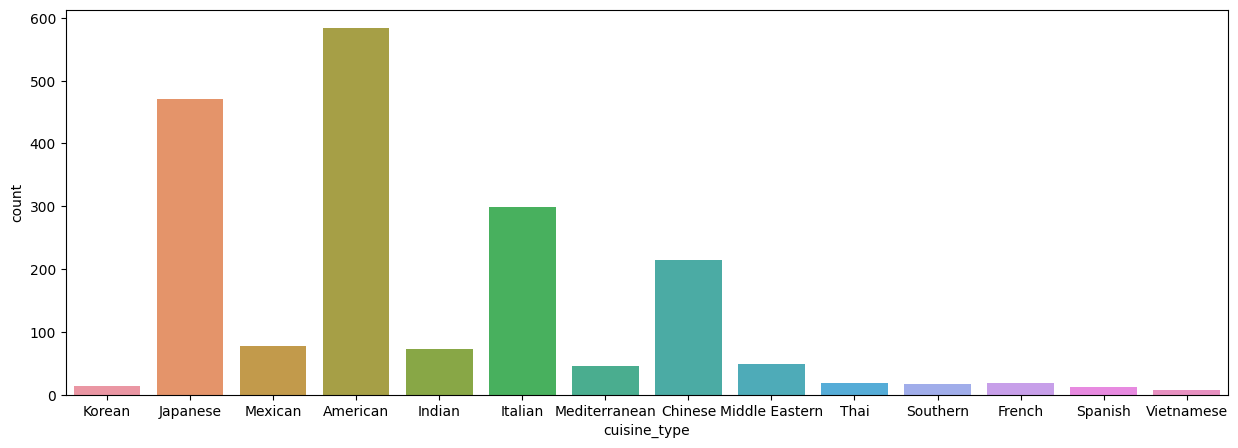

In [90]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type') # Create a countplot for cuisine type

#### Cost of the order

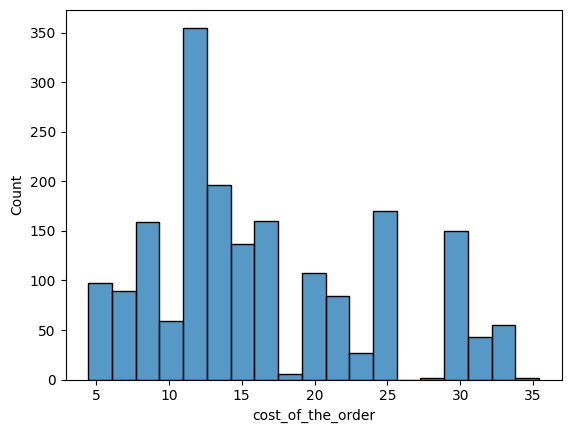

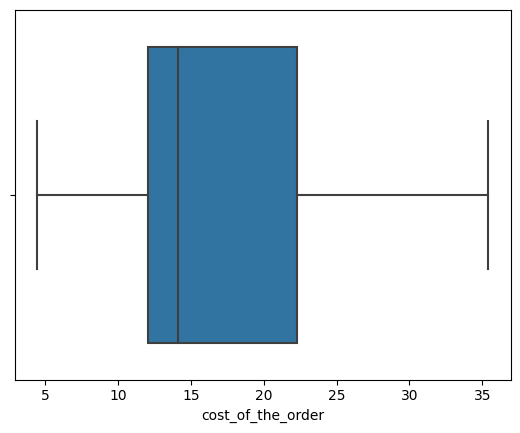

In [91]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()

#### Day of the week

In [94]:
# # Check the unique values
print("Unique Values for the dat_of_the_week are:\n", df['day_of_the_week'].unique()) # Complete the code to check unique values for the 'day_of_the_week' column

Unique Values for the dat_of_the_week are:
 ['Weekend' 'Weekday']


<Axes: xlabel='day_of_the_week', ylabel='count'>

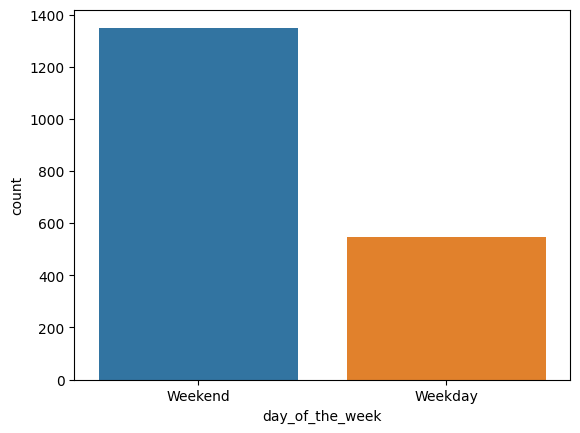

In [95]:
sns.countplot(data = df, x = 'day_of_the_week') # Complete the code to plot a bar graph for 'day_of_the_week' column

#### Rating

In [99]:
# Check the unique values
print("Unique Rating Values are: ", df['rating'].unique())

Unique Rating Values are:  ['Not given' '5' '3' '4']


<Axes: xlabel='rating', ylabel='count'>

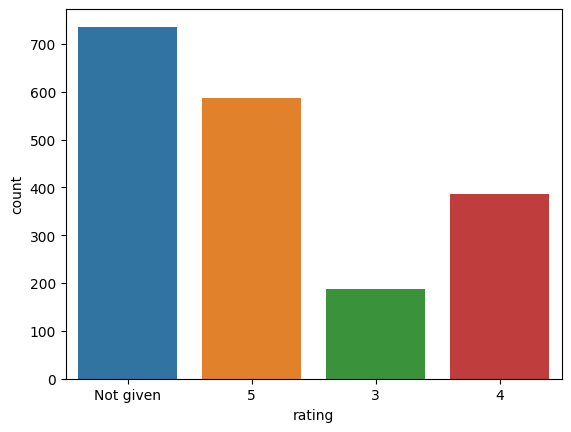

In [100]:
sns.countplot(data = df, x = 'rating') # Complete the code to plot bar graph for 'rating' column

#### Food Preparation time

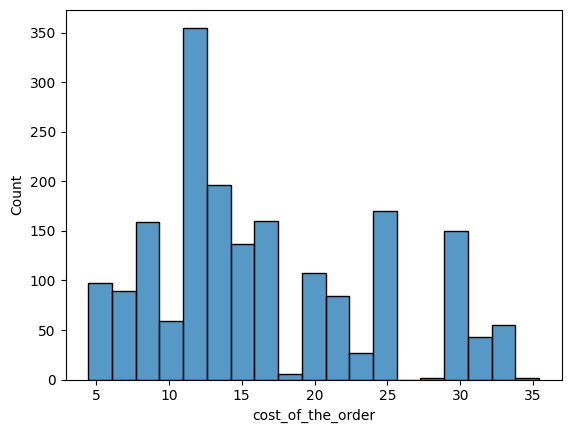

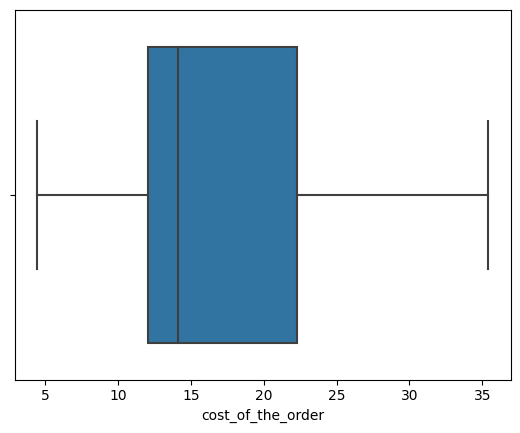

In [101]:
sns.histplot(data=df,x='cost_of_the_order') # Complete the code to plot the histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') # Complete the code to plot the boxplot for the cost of order
plt.show()

#### Delivery time

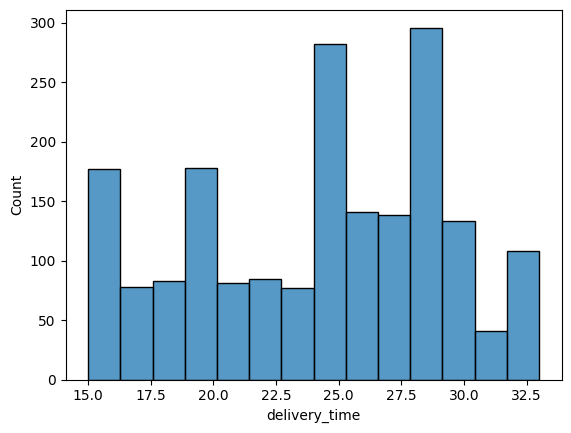

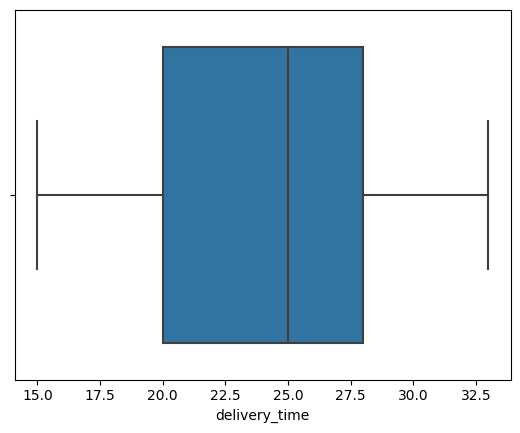

In [102]:
sns.histplot(data=df,x='delivery_time') # Complete the code to plot the histogram for the delivery time
plt.show()
sns.boxplot(data=df,x='delivery_time')  # Complete the code to plot the boxplot for the delivery time
plt.show()

### **Question 7:** Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [117]:
# Get top 5 restaurants with highest number of orders
# df['restaurant_name']._______ # Complete the code
count_df = df.groupby('restaurant_name')['order_id'].count().reset_index()
top_5_restaurants = count_df.nlargest(5, 'order_id')
print("Top 5 Restaurants with maximum orders are:\n\n", top_5_restaurants)
final_values = top_5_restaurants['restaurant_name'].values
print("\nName of top 5 Restaurants with maximum orders are:", final_values)

Top 5 Restaurants with maximum orders are:

                restaurant_name  order_id
136                Shake Shack       219
153          The Meatball Shop       132
21           Blue Ribbon Sushi       119
20   Blue Ribbon Fried Chicken        96
109                       Parm        68

Name of top 5 Restaurants with maximum orders are: ['Shake Shack' 'The Meatball Shop' 'Blue Ribbon Sushi'
 'Blue Ribbon Fried Chicken' 'Parm']


### **Question 8:** Which is the most popular cuisine on weekends? [1 mark]

In [119]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
print("Popular Cusine Types on weekend are: ", df_weekend['cuisine_type'].unique())  # Complete the code to check unique values for the cuisine type on weekend

Popular Cusine Types on weekend are:  ['Korean' 'Japanese' 'American' 'Italian' 'Mexican' 'Mediterranean'
 'Chinese' 'Indian' 'Thai' 'Southern' 'French' 'Spanish' 'Middle Eastern'
 'Vietnamese']


### **Question 9:** What percentage of the orders cost more than 20 dollars? [2 marks]

In [120]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] # Write the appropriate column name to get the orders having cost above $20

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


### **Question 10:** What is the mean order delivery time? [1 mark]

In [121]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()  # Write the appropriate function to obtain the mean delivery time

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [123]:
# Get the counts of each customer_id
print("The top three most frquent customers are:\n", df['customer_id'].value_counts().head(3))  # Write the appropriate column name to get the 5 most frequent customers

The top three most frquent customers are:
 52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


### Multivariate Analysis

### **Question 12:** Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]

#### Cuisine vs Cost of the order

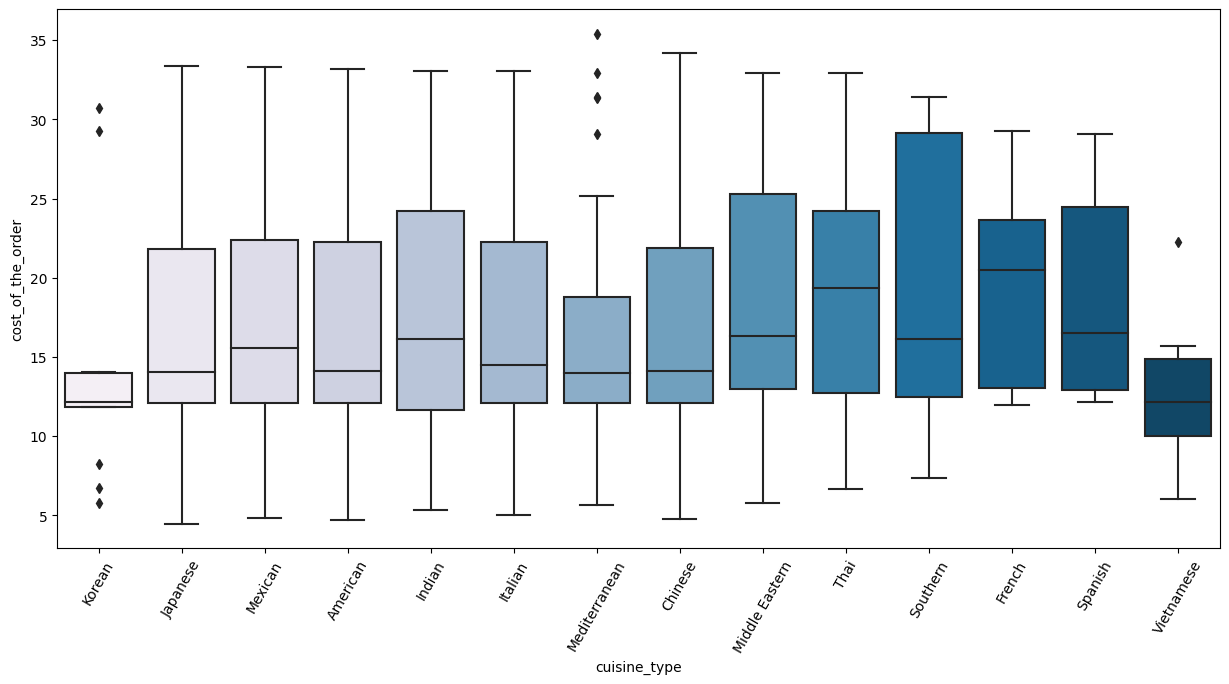

In [124]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Cuisine vs Food Preparation time

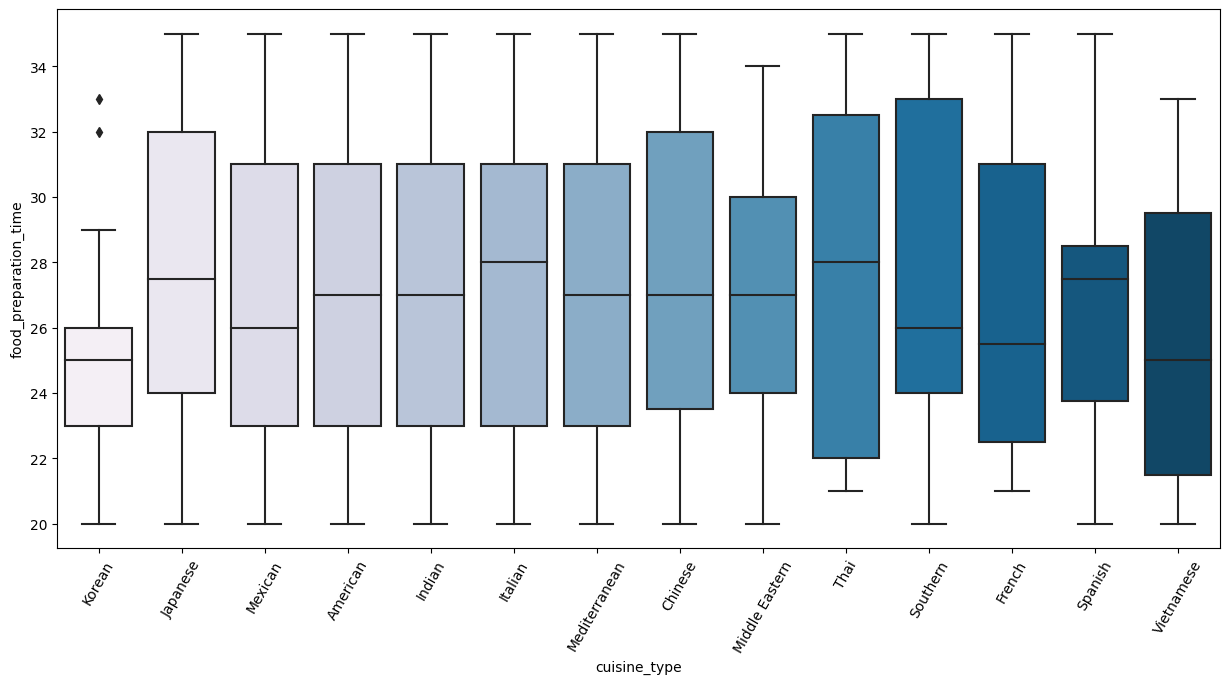

In [127]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')  # Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
plt.show()

#### Day of the Week vs Delivery time

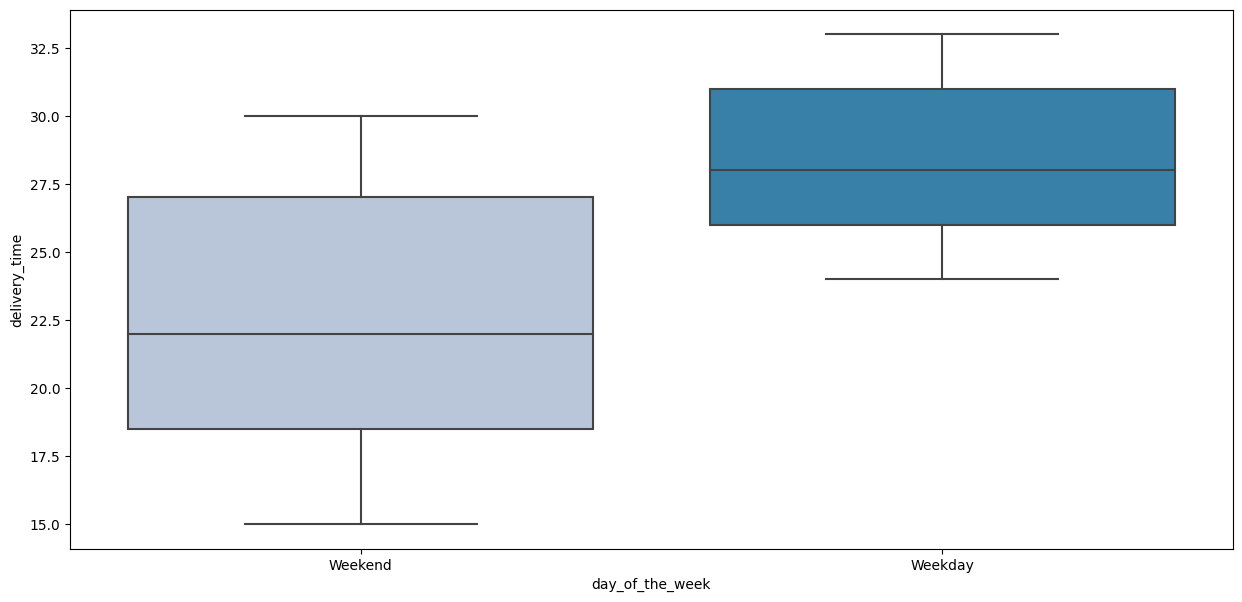

In [130]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu')  # Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

#### Run the below code and write your observations on the revenue generated by the restaurants.

In [131]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

Obervations:
1. A total of top 14 restaurants with total revenue from orders are printed
2. The list of the top 14 restaurants are printed in descending order
3. Some restaurants doing extremely well while others are poor in performance


#### Rating vs Delivery time

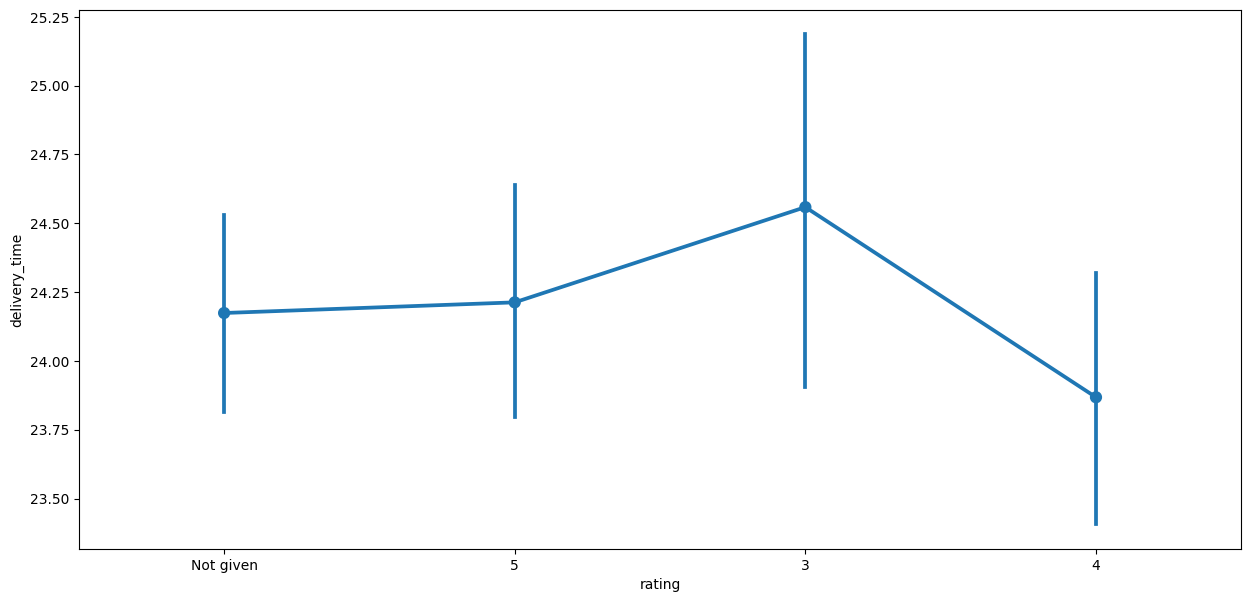

In [132]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

**Observations:**
1. There is no concrete relation between rating and delivery times (Ex: Rating is directly proportional to delivery time etc.)
2. Least rated restaurants for sure are taking longer to deliver food
3. Restaurants rated 4 on an average for sure beat the other restaursnts in their delivery time
4. Deliery time exceeding 24.25 Minutes tend to have either "No Rating given" or 3 in rating

#### Rating vs Food preparation time

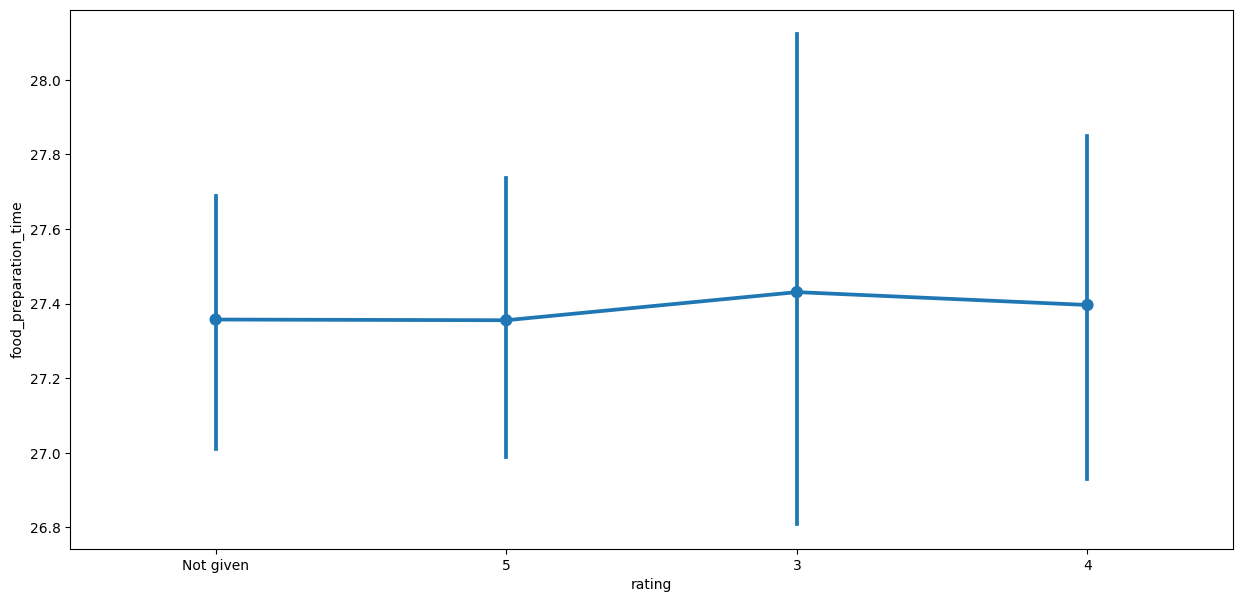

In [134]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)  # Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.show()

**Observations:**
1. Almost all restaurants take about 27.3 to 27.4 Minutes to prepare the food on an average
2. Rating are less relatively when the food preparation time is longer

#### Rating vs Cost of the order

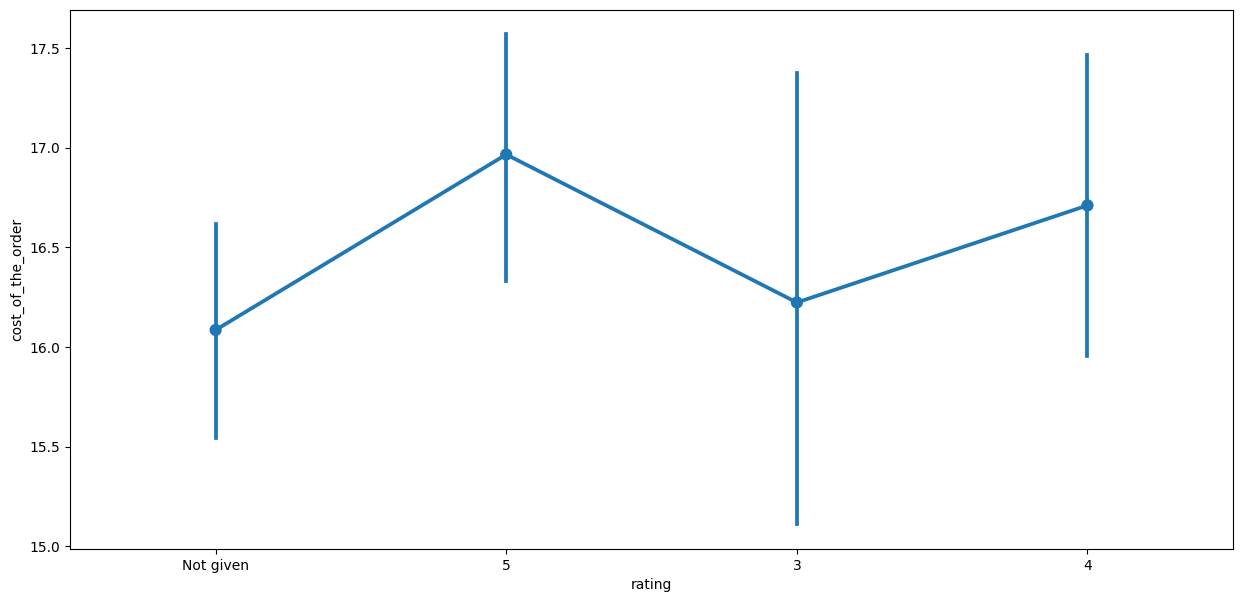

In [136]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)   # Complete the code to visualize the relationship between rating and cost of the order using pointplot
plt.show()

Obervations:
1. It can be interpreted that quality and taste comes with cost
2. Most of ratings not given for cheaper orders
3. Rating 4 and 5 are obtained on an average for higher cost orders


#### Correlation among variables

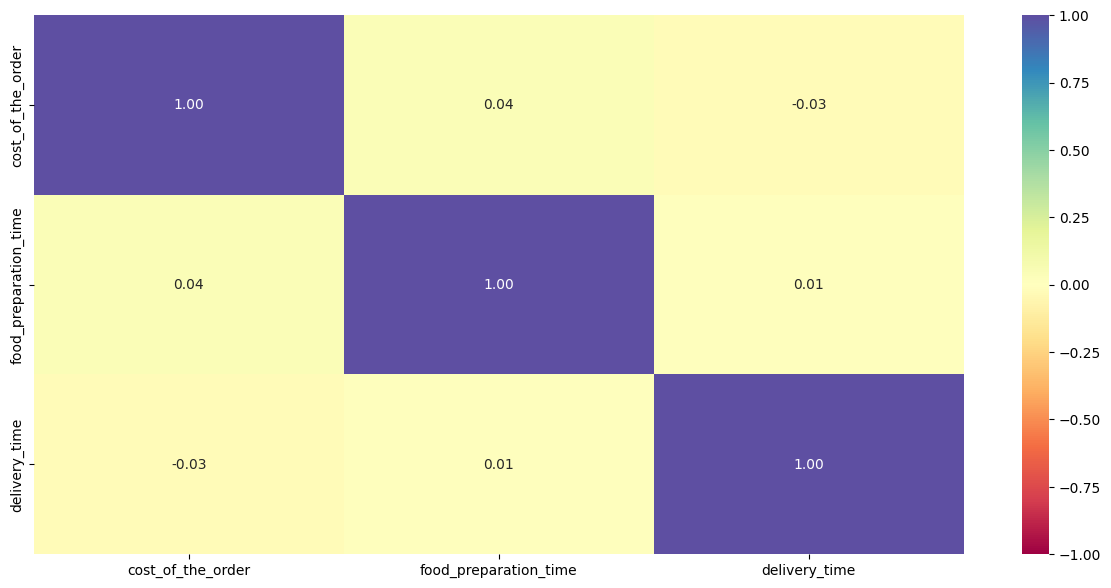

In [137]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [138]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [139]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name'] # Complete the code to get the restaurant names having rating count more than 50

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() # Complete the code to find the mean rating


,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [140]:
# Function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) # Write the apprpriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [141]:
# Get the total revenue and print it
total_rev = df['Revenue'].sum() # Write the appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]


In [158]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
total_orders = df['order_id'].nunique()
print("Total Number of orders are:", total_orders)
filtered_df = df['total_time'][df['total_time'] > 60].count()
print("Total Orders who took more than 60 mins: ", filtered_df)
print("Percentage of orders who took more than 60 Mins: ", filtered_df/total_orders*100)

# Write the code below to find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)





Total Number of orders are: 1898
Total Orders who took more than 60 mins:  200
Percentage of orders who took more than 60 Mins:  10.537407797681771


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [161]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

# Write the code below to get the mean delivery time on weekends and print it
print('The mean delivery time on weekend is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')





The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekend is around 22 minutes


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
1. Delivery time on the weekdays should be improved but its evident that due to traffic congestions there is a delay. Expectations should be set to customers regarding the anticipated order arrival time.
2. Relatively good ratings are given to restaurants with more cost of order
[Quality and taste comes with Cost]
3. American and Italian cusines topped the charts in revenues.
4. Preferred choice of cuisines are American and Japanese


### Recommendations:

*  Majority of the orders are not rated, some action should be in place to get users to rate for orders which help in better serving them
*  Food Preparation time is longer than Food Delivery time in almost all the cases, attention in that area is needed
*  Cheaper cusines like Vietnamese and Korean tend to have less orders, Focus should be kept to imporve the quality
* Onboard more American, Italian and Japanese restaurants to the FoodHub app as there is more demand for these cusines in the area
* More orders are placed on weekends, so planning to onboard more delivery persons should be done

---